<a href="https://colab.research.google.com/github/Mifekmk/SkillTreePython-DataAnalysis/blob/main/ch00_04_OpenCV%ED%99%9C%EC%9A%A9_haarcascade_%EA%B0%9D%EC%B2%B4%EC%9D%B8%EC%8B%9D_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch00.04. OpenCV 활용 - haarcascade 객체인식

---
* 날짜: 2022-06-14
* 이름: 김민규

## 학습내용
    - 이미지에서 객체 인식하기
    - 동영상에서 객체 인식하기

## 학습자료


- [OpenCV 홈페이지](https://opencv.org/)

- [OpenCV-pythoin Documentation](https://opencv-python.readthedocs.io/en/latest/)

- [face-recognition](https://face-recognition.readthedocs.io/en/latest/readme.html#features)


## 개념정리
---

![](https://github.com/yebiny/Image-Segmentation-TF2/blob/main/imgs/seg_type.png?raw=true)

* 어려운 것 : 학습하는 것
* 쉬운 거 : 학습된걸 가져다 쓰는 것

## face recognition를 이용한 얼굴탐지
---



#### **세팅**

```
! pip install face_recognition
```

In [ ]:
! pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import face_recognition as fr
import cv2
import matplotlib.pyplot as plt
print(cv2.__version__)

4.1.2


#### **예측**

In [ ]:
f_path = 'p1.JPG'
img = fr.load_image_file(f_path)# 전처리
pred = fr.face_locations(img) #예측
print(pred,len(pred)) #(왼쪽 상단 x,y , 오른쪽 하단 x,y)

[(20, 106, 72, 55)] 1


#### **결과 시각화**

* return : (y1, x2, y2, x1)

20 106 72 55


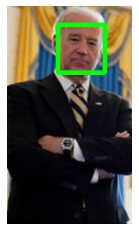

In [ ]:
# 왼쪽 위 좌표 = 시작좌표 = (x1, y1)
# 오른쪽 아래 좌표 = 끝 좌표 = (x2, y2)
for (y1,x2,y2,x1) in pred:
    print(y1, x2, y2, x1)
    # 사각형 그리기
    cv2.rectangle(img, (x1,y1),(x2,y2),(0,255,0),3)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
f_path = 'p2.JPG'
img = fr.load_image_file(f_path)# 전처리
pred = fr.face_locations(img) #예측
print(pred,len(pred)) #(왼쪽 상단 x,y , 오른쪽 하단 x,y)

[(50, 101, 86, 65)] 1


50 101 86 65


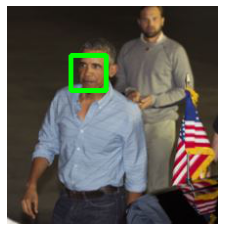

In [ ]:
# 왼쪽 위 좌표 = 시작좌표 = (x1, y1)
# 오른쪽 아래 좌표 = 끝 좌표 = (x2, y2)
for (y1,x2,y2,x1) in pred:
    print(y1, x2, y2, x1)
    # 사각형 그리기
    cv2.rectangle(img, (x1,y1),(x2,y2),(0,255,0),3)
plt.imshow(img)
plt.axis('off')
plt.show() 
# 장점 : 연산 리소스를 적게 필요로 합니다.
# 사람 얼굴 한 사람만 나옵니다. 성능이 좋지 않습니다.

In [ ]:
f_path = 'p3.png'
img = fr.load_image_file(f_path)# 전처리
pred = fr.face_locations(img) #예측
print(pred,len(pred))

[(160, 613, 345, 428), (12, 408, 167, 253), (192, 291, 415, 68), (180, 737, 366, 551), (142, 1083, 365, 860), (0, 700, 150, 545)] 6


160 613 345 428
12 408 167 253
192 291 415 68
180 737 366 551
142 1083 365 860
0 700 150 545


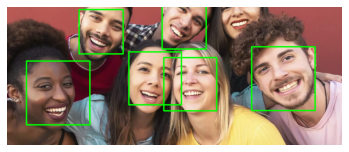

In [ ]:
# 왼쪽 위 좌표 = 시작좌표 = (x1, y1)
# 오른쪽 아래 좌표 = 끝 좌표 = (x2, y2)
for (y1,x2,y2,x1) in pred:
    print(y1, x2, y2, x1)
    # 사각형 그리기
    cv2.rectangle(img, (x1,y1),(x2,y2),(0,255,0),3)
plt.imshow(img)
plt.axis('off')
plt.show() 

## OpenCV를 이용한 얼굴탐지
---

### **Harr Feature Selection**

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FCGrST%2FbtqwozewRoL%2F97TeD7AXg37r84HSrpJ7n0%2Fimg.png)

[참고블로그](https://webnautes.tistory.com/1352)

### | 이미지에 적용하기

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

#### **세팅**

필요 파일
```
face_cascade_name = 'haarcascade_frontalface_alt.xml'
eyes_cascade_name = 'haarcascade_eye_tree_eyeglasses.xml'
file_name = 'obama_01.jpeg, obama_02.jpeg, obama_01.jpg'
```

파일 위치
```
- opencv
  - data
    - haarcascades
```

In [ ]:
face_cascade_name = 'haarcascade_frontalface_alt.xml'
eyes_cascade_name = 'haarcascade_eye_tree_eyeglasses.xml'
f_path = 'p3.png'

In [ ]:
# 분류기 객체 생성 (2개)
face_model = cv2.CascadeClassifier()
eyes_model = cv2.CascadeClassifier()

In [ ]:
# 파라미터를 객체에 로드
face_model.load(cv2.samples.findFile(face_cascade_name))

error: ignored

In [ ]:
# 파라미터를 객체에 로드
eyes_model.load(cv2.samples.findFile(eyes_cascade_name))

True

#### **전처리**

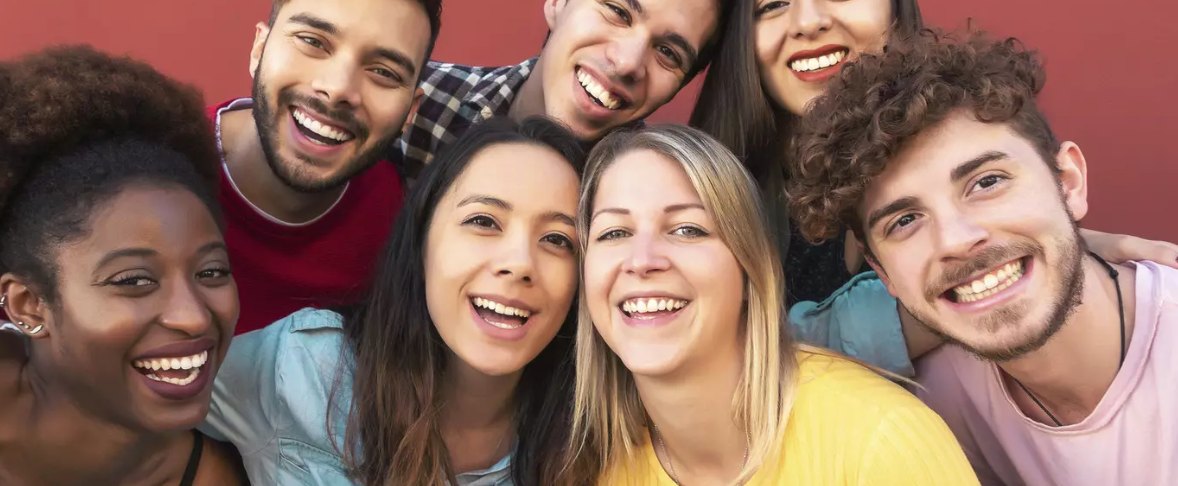

In [ ]:
img = cv2.imread(f_path)
cv2_imshow(img)

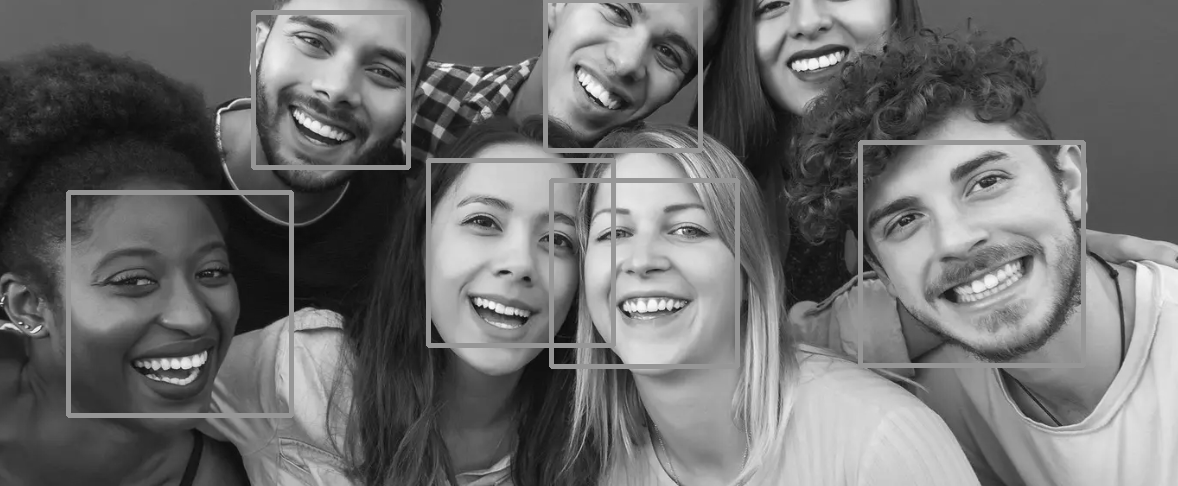

In [ ]:
# 1채널(흑백) 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

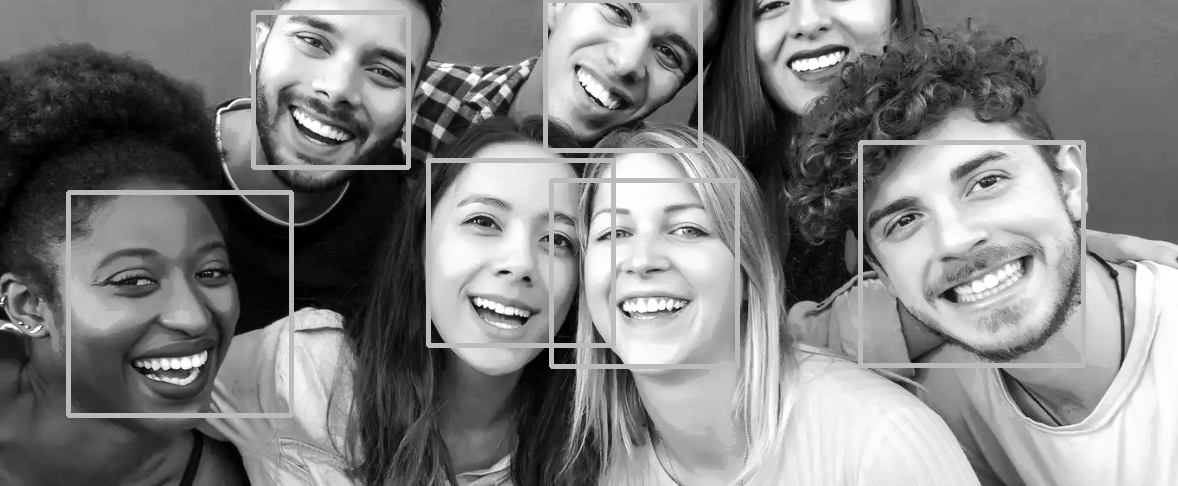

In [ ]:
# 장점 : 노이즈 제거
hist = cv2.equalizeHist(gray) # 0~255의 값들의 범위를 줄여주는 것
cv2_imshow(hist)

#### **예측**


In [ ]:
pred = face_model.detectMultiScale(hist)
print(pred)

[[415 152 198 198]
 [558 159 186 186]
 [ 60 193 217 217]]


* result : (x1, y1, w, h)

In [ ]:
x, y, w, h =pred[0]
print(x, y, w, h)

415 152 198 198


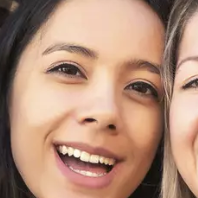

In [ ]:
# 좌표 부분만 크롭
croped = img[y:y+h, x:x+w] # 행:y, 열:x
cv2_imshow(croped)

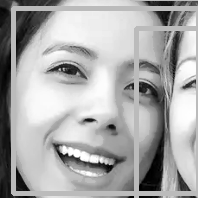

In [ ]:
# 좌표 부분만 크롭
croped = hist[y:y+h, x:x+w] # 행:y, 열:x
# hist는 전처리가 된 사진자료
cv2_imshow(croped)

In [ ]:
# 눈을 찾는 모델
pred_eyes = eyes_model.detectMultiScale(croped)
print(pred_eyes)

[[ 46  48  45  45]
 [118  68  43  43]]


In [ ]:
x, y, w, h =pred_eyes[0]
print(x, y, w, h)

46 48 45 45


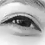

In [ ]:
# 좌표 부분만 크롭
eye = croped[y:y+h, x:x+w] # 행:y, 열:x
cv2_imshow(eye)

#### **함수화**

In [ ]:
def path2detect(path):
    # 전처리
    org_img = cv2.imread(path)
    img = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)

    # 예측 및 시각화
    # 얼굴인식
    face_preds = face_model.detectMultiScale(img)
    for face_pred in face_preds: # 얼굴마다,
        x = face_pred[0]  # 좌표출력
        y = face_pred[1]
        w = face_pred[2]
        h = face_pred[3]
        print(f'face: {x}, {y}, {w}, {h}')
        cv2.rectangle(org_img, (x,y), (x+w, y+h), (0,255,0), 3) # 바운딩박스 그리기
        # 눈인식을 위한 얼굴 크롭
        face = img[y:y+h, x:x+w]
        
        eyes_preds = eyes_model.detectMultiScale(face) # 눈 인식
        for (x2, y2, w2, h2) in eyes_preds: # 눈 마다, 
            print(f'eyes: {x2}, {y2}, {w2}, {h2}') # 좌표 출력
            center = (x+x2+w2//2 , y+y2+h2//2) #(얼굴 시작점+ 눈의 시작점) 원본 이미지에 대한 좌표
            radius = int(round((w2+h2)*.25))
            cv2.circle(org_img, center, radius, (0,255,255), 3) # 원 그리기
#cv2_imshow(org_img)

* 함수사용

In [ ]:
path2detect('p3.png')

face: 559, 160, 183, 183
eyes: 103, 47, 49, 49
eyes: 37, 54, 42, 42
face: 416, 153, 201, 201
eyes: 44, 46, 46, 46
eyes: 117, 66, 43, 43
face: 63, 197, 212, 212
eyes: 43, 56, 55, 55
eyes: 120, 54, 46, 46


### | 비디오에 적용하기

#### **세팅**
* 런타임 : GPU / 고용량 램 사용

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
import IPython

In [ ]:
face_cascade_name = 'haarcascade_frontalface_alt.xml'
eyes_cascade_name = 'haarcascade_eye_tree_eyeglasses.xml'

In [ ]:
# 분류기 객체 생성 (2개)
face_model = cv2.CascadeClassifier()
eyes_model = cv2.CascadeClassifier()

In [ ]:
# 파라미터를 객체에 로드
face_model.load(cv2.samples.findFile(face_cascade_name))

error: ignored

In [ ]:
# 파라미터를 객체에 로드
eyes_model.load(cv2.samples.findFile(eyes_cascade_name))

True

#### **함수화**

In [ ]:
def frame2detect(frame):
    IPython.display.clear_output(wait = True) # 출력결과 매번 지워줌
    # 전처리
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)

    # 예측 및 시각화
    # 얼굴인식
    face_preds = face_model.detectMultiScale(img)
    for face_pred in face_preds: # 얼굴마다,
        x = face_pred[0]  # 좌표출력
        y = face_pred[1]
        w = face_pred[2]
        h = face_pred[3]
        #print(f'face: {x}, {y}, {w}, {h}')
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 3) # 바운딩박스 그리기
        # 눈인식을 위한 얼굴 크롭
        face = img[y:y+h, x:x+w]
        
        eyes_preds = eyes_model.detectMultiScale(face) # 눈 인식
        for (x2, y2, w2, h2) in eyes_preds: # 눈 마다, 
            print(f'eyes: {x2}, {y2}, {w2}, {h2}') # 좌표 출력
            center = (x+x2+w2//2 , y+y2+h2//2) #(얼굴 시작점+ 눈의 시작점) 원본 이미지에 대한 좌표
            radius = int(round((w2+h2)*.25))
            cv2.circle(frame, center, radius, (0,255,255), 3) # 원 그리기
    cv2_imshow(frame)

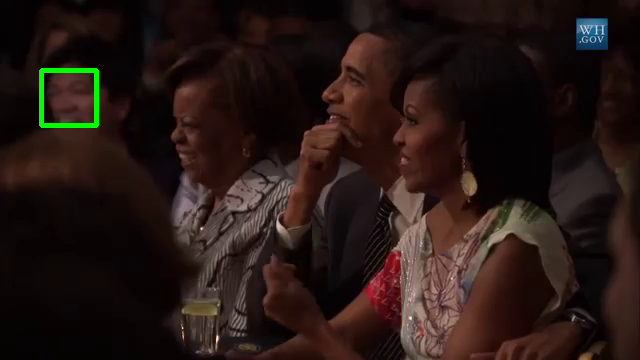

No frame !


In [ ]:
# 경로오부터 비디오의 프레임 얻기
cap = cv2.VideoCapture('/content/short_hamilton_clip.mp4') # 비디오 캡처
while True:
    _, frame = cap.read()# 캡처로부터 비디오 프레임 얻기
    #print(frame)
    if frame is None: # 프레임 끝나면 종료
        print('No frame !')
        break
    frame2detect(frame)

## 과제
---



### **과제 01**

[히스토그램](https://opencv-python.readthedocs.io/en/latest/doc/19.imageHistograms/imageHistograms.html)

* OpenCV를 이용하여 Histogram을 찾을 수 있다.
* OpenCV와 Matplotlib를 이용하여 Histogram을 표현할 수 있다.
* cv2.calcHist() 와 np.histogram() 함수를 사용할 수 있다.

[히스토그램 균일화](https://opencv-python.readthedocs.io/en/latest/doc/20.imageHistogramEqualization/imageHistogramEqualization.html)


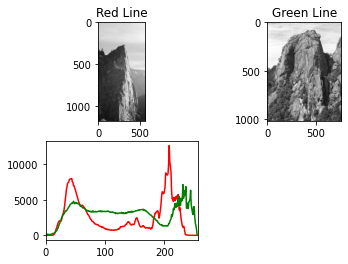

In [ ]:
#-*- coding:utf-8 -*-
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

img1 = cv2.imread('/content/Mountain_1.jpg',0)
img2 = cv2.imread('/content/Mountain_2.png',0)

hist1 = cv2.calcHist([img1],[0],None,[256],[0,256])
hist2 = cv2.calcHist([img2],[0],None,[256],[0,256])

plt.subplot(221),plt.imshow(img1,'gray'),plt.title('Red Line')
plt.subplot(222),plt.imshow(img2,'gray'),plt.title('Green Line')
plt.subplot(223),plt.plot(hist1,color='r'),plt.plot(hist2,color='g')
plt.xlim([0,256])
plt.show()

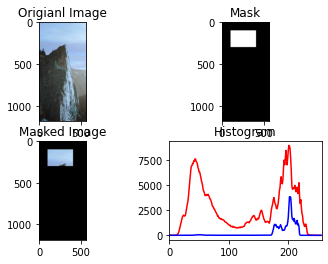

In [ ]:
#-*-coding:utf-8-*-
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('/content/Mountain_1.jpg');

# mask생성
mask = np.zeros(img.shape[:2],np.uint8)
mask[100:300,100:400] = 255

# 이미지에 mask가 적용된 결과
masked_img = cv2.bitwise_and(img,img,mask=mask)

# 원본 이미지의 히스토그램
hist_full = cv2.calcHist([img],[1],None,[256],[0,256])

# mask를 적용한 히스트로그램
hist_mask = cv2.calcHist([img],[1],mask,[256],[0,256])

plt.subplot(221),plt.imshow(img,'gray'),plt.title('Origianl Image')
plt.subplot(222),plt.imshow(mask,'gray'),plt.title('Mask')
plt.subplot(223),plt.imshow(masked_img,'gray'),plt.title('Masked Image')

# red는 원본이미지 히스토그램, blue는 mask적용된 히스토그램
plt.subplot(224),plt.title('Histogram')
plt.plot(hist_full,color='r'),plt.plot(hist_mask,color='b')
plt.xlim([0,256])

plt.show()

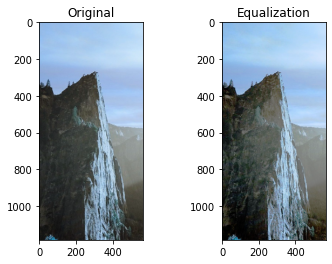

In [ ]:
#-*-coding:utf-8-*-
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('/content/Mountain_1.jpg');

hist, bins = np.histogram(img.flatten(), 256,[0,256])

cdf = hist.cumsum()

# cdf의 값이 0인 경우는 mask처리를 하여 계산에서 제외
# mask처리가 되면 Numpy 계산에서 제외가 됨
# 아래는 cdf array에서 값이 0인 부분을 mask처리함
cdf_m = np.ma.masked_equal(cdf,0)

#History Equalization 공식
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())

# Mask처리를 했던 부분을 다시 0으로 변환
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(img2),plt.title('Equalization')
plt.show()

In [ ]:
#-*-coding:utf-8-*-
#-*-coding:utf-8-*-
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('/content/Mountain_2.png',0);

# OpenCV의 Equaliztion함수
img2 = cv2.equalizeHist(img)
img = cv2.resize(img,(400,400))
img2 = cv2.resize(img2,(400,400))

dst = np.hstack((img, img2))
cv2.imshow('img',dst)
cv2.waitKey()
cv2.destroyAllWindows()

DisabledFunctionError: ignored

### **과제 02**
```
- haarcascade_smile.xml
- haarcascade_upperbody.xml
```

In [ ]:
# 이미지
# 동영상
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
smile_cascade_name = '/content/haarcascade_smile.xml'
upperbody_cascade_name = '/content/haarcascade_upperbody.xml'
f_smile_path = 'p3.png'
f_upperbody_path = 'upperbody.jpg'

In [ ]:
# 분류기 객체 생성 (2개)
smile_model = cv2.CascadeClassifier()
upperbody_model = cv2.CascadeClassifier()

In [ ]:
# 파라미터를 객체에 로드
smile_model.load(cv2.samples.findFile(smile_cascade_name))

True

In [ ]:
# 파라미터를 객체에 로드
upperbody_model.load(cv2.samples.findFile(upperbody_cascade_name))

True

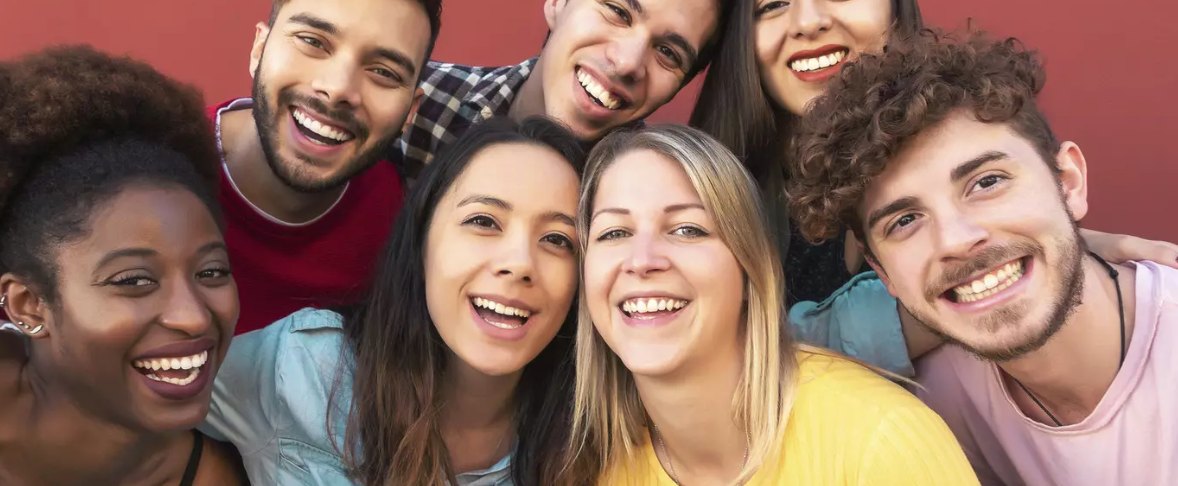

In [ ]:
img = cv2.imread(f_smile_path)
cv2_imshow(img)

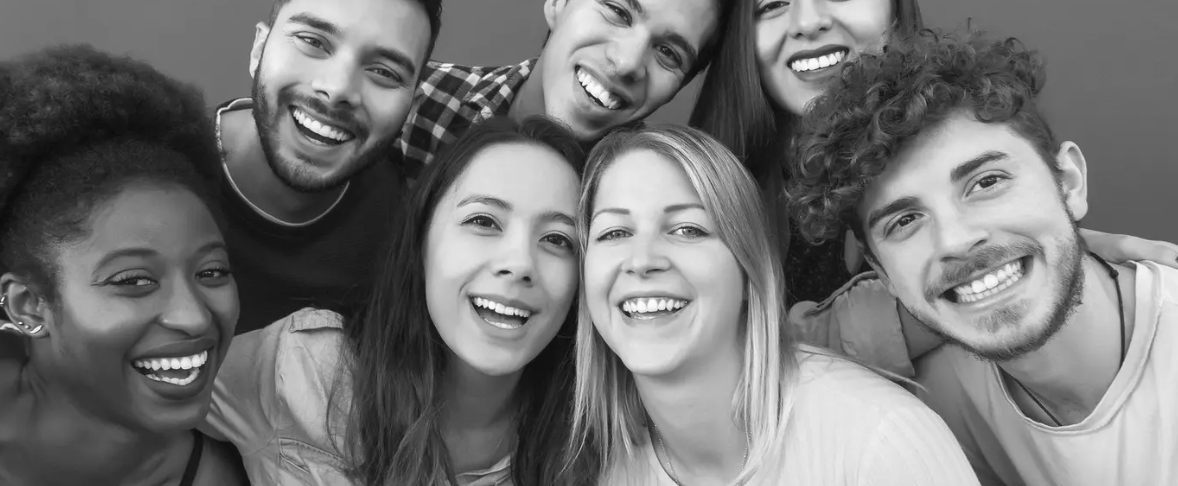

In [ ]:
# 1채널(흑백) 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

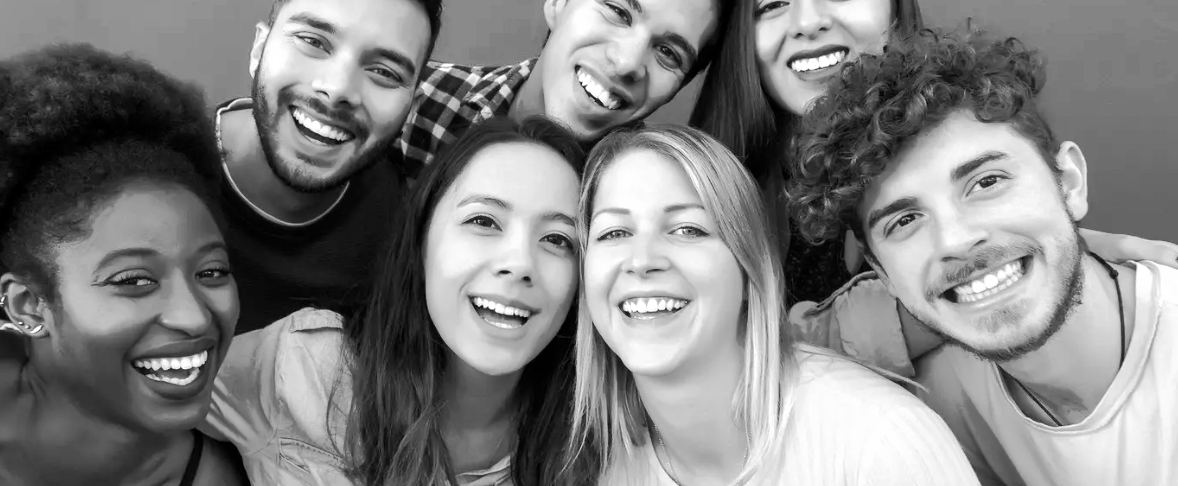

In [ ]:
# 장점 : 노이즈 제거
hist = cv2.equalizeHist(gray) # 0~255의 값들의 범위를 줄여주는 것
cv2_imshow(hist)

In [ ]:
pred = smile_model.detectMultiScale(hist)
print(pred)

[[244  27  57  29]
 [297 156  43  22]
 [251 175  60  30]
 [278 143  84  42]
 [324 197  64  32]
 [168 232  81  41]
 [161 191  90  45]
 [112 191  82  41]
 [184  35 232 116]
 [335 279  46  23]
 [292 289  41  20]
 [303 228  82  41]
 [279 298  78  39]
 [355 297  77  39]
 [196 362 162  81]
 [304 270  98  49]
 [102 352  40  20]
 [ 90 357  43  21]
 [235 340  54  27]
 [304 338 133  66]
 [279 462  43  21]
 [228 470  43  21]
 [387 441  73  36]
 [ 76 459  76  38]
 [355 488  71  36]
 [329 471  69  34]
 [ 97 564 291 145]]


In [ ]:
x, y, w, h =pred[0]
print(x, y, w, h)

244 27 57 29


In [ ]:
# 좌표 부분만 크롭
croped = img[y:y+h, x:x+w] # 행:y, 열:x
cv2_imshow(croped)